# Workload visualization

To visualize generated workloads as CDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### utility functions

In [2]:
def load_binary_data(filepath, is_workload=False):
    data = np.fromfile(filepath, dtype=np.uint64)
    if is_workload:
        return data
    return data[1:]

def count_frequency(data):
    unique, counts = np.unique(data, return_counts=True)
    count_dict = dict()
    for uniq, count in zip(unique, counts):
        count_dict[uniq] = count
    return unique, count_dict

def cdf(x_values, freq_dict):
    cdf = [freq_dict.get(x, 0) for x in x_values]
    cdf = np.cumsum(cdf)
    total = cdf[-1]
    return np.divide(cdf, total)

def plot_dataset(ax, data_path, workload_paths, alphas, colors):
    
    print("generarting cdf for {}".format(data_path))
    data = load_binary_data(data_path, False)
    x_values, data_freq = count_frequency(data)
    x_values = sorted(x_values)
    data_cdf = cdf(x_values, data_freq)
    ax.plot(x_values, data_cdf, label="original data", c=colors[0])

    for wl_path, alpha, color in zip(workload_paths, alphas, colors[1:]):
        print("generating cdf for {}".format(wl_path))
        workload = load_binary_data(wl_path, True)
        _, wl_freq = count_frequency(workload)
        workload_cdf = cdf(x_values, wl_freq)
        ax.plot(x_values, workload_cdf, label="alpha = {}".format(alpha), c=color)
    return ax

### plot

Dataset to plot:
- wiki workload unit64 200M
    - alpha 1.1
    - alpha 2
    - alpha 3
    - alpha 4
    - alpha 5

In [4]:
# wiki dataset
wiki_data = "SOSD/data/wiki_ts_200M_uint64"
wiki_workloads = [
    "workloads/wiki_ts_200M_uint64_workload100k_alpha1.1",
    "workloads/wiki_ts_200M_uint64_workload100k_alpha2.0",
    "workloads/wiki_ts_200M_uint64_workload100k_alpha3.0",
    "workloads/wiki_ts_200M_uint64_workload100k_alpha4.0",
    "workloads/wiki_ts_200M_uint64_workload100k_alpha5.0"
]

# osmc dataset
osmc_data = "SOSD/data/osm_cellids_200M_uint64"
osmc_workloads = [
    "workloads/osm_cellids_200M_uint64_workload100k_alpha1.1",
    "workloads/osm_cellids_200M_uint64_workload100k_alpha2.0",
    "workloads/osm_cellids_200M_uint64_workload100k_alpha3.0",
    "workloads/osm_cellids_200M_uint64_workload100k_alpha4.0",
    "workloads/osm_cellids_200M_uint64_workload100k_alpha5.0"
]

# configuration
alphas = [1.1, 2, 3, 4, 5]
plot_colors = ["tab:blue", "tab:orange", "tab:pink", "tab:purple", "tab:red", "tab:gray"]

generarting cdf for SOSD/data/wiki_ts_200M_uint64
generating cdf for workloads/wiki_ts_200M_uint64_workload100k_alpha1.1
generating cdf for workloads/wiki_ts_200M_uint64_workload100k_alpha2.0
generating cdf for workloads/wiki_ts_200M_uint64_workload100k_alpha3.0
generating cdf for workloads/wiki_ts_200M_uint64_workload100k_alpha4.0
generating cdf for workloads/wiki_ts_200M_uint64_workload100k_alpha5.0
generarting cdf for SOSD/data/osm_cellids_200M_uint64
generating cdf for workloads/osm_cellids_200M_uint64_workload100k_alpha1.1
generating cdf for workloads/osm_cellids_200M_uint64_workload100k_alpha2.0
generating cdf for workloads/osm_cellids_200M_uint64_workload100k_alpha3.0
generating cdf for workloads/osm_cellids_200M_uint64_workload100k_alpha4.0
generating cdf for workloads/osm_cellids_200M_uint64_workload100k_alpha5.0


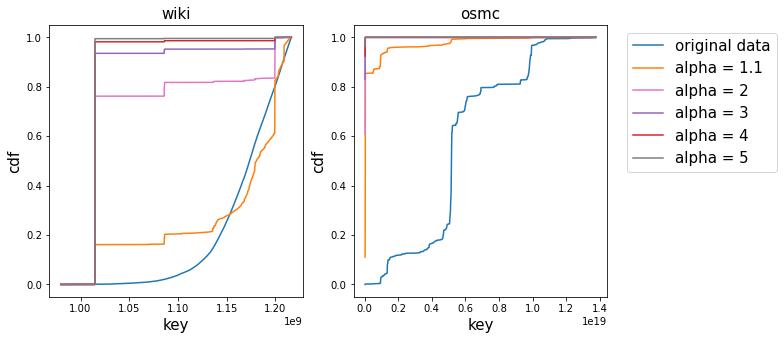

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0] = plot_dataset(axs[0], wiki_data, wiki_workloads, alphas, plot_colors)
axs[1] = plot_dataset(axs[1], osmc_data, osmc_workloads, alphas, plot_colors)
axs[0].set_title("wiki", fontsize=15)
axs[1].set_title("osmc", fontsize=15)
for ax in axs:
    ax.set_xlabel("key", fontsize=15)
    ax.set_ylabel("cdf", fontsize=15)
axs[-1].legend(fontsize=15, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("figs/generated_workloads.pdf", bbox_inches="tight")